In [1]:
import quimb.tensor as qtn

/home/sijingdu/anaconda3/envs/fermion/lib/python3.9/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
peps = qtn.PEPS.rand(4, 4, 2, seed=42)

In [3]:
def delocalize_in_cross(peps, diag=False):

    peps = peps.copy()

    for (i, j) in peps.sites:
        t = peps[i, j]

        if diag:
            neighbors = [
                (i + 1, j + 1),
                (i - 1, j - 1),
                (i + 1, j - 1),
                (i - 1, j + 1),
            ]
        else:
            neighbors = [
                (i + 1, j),
                (i - 1, j),
                (i, j + 1),
                (i, j - 1),
            ]
        for neighbor in neighbors:
            if peps.valid_coo(neighbor):
                t.new_ind(peps.site_ind(neighbor), mode="repeat", size=2)
    return peps

In [4]:
dpeps = delocalize_in_cross(peps, diag=True)

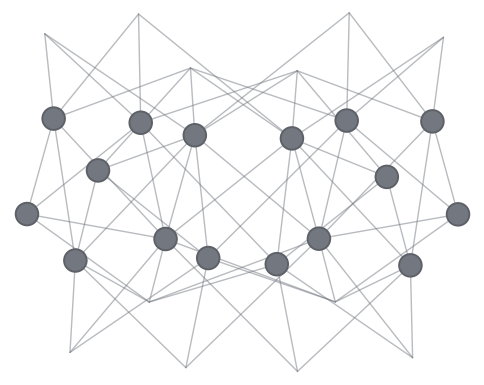

In [5]:
dpeps.draw()

In [6]:
from vmc_torch.experiment.tn_model import PEPS_model, PEPS_delocalized_Model

In [13]:
import torch
peps.apply_to_arrays(torch.tensor)
dpeps.apply_to_arrays(torch.tensor)
peps_model = PEPS_model(peps)
dpeps_model = PEPS_delocalized_Model(peps, diag=True)

/home/sijingdu/anaconda3/envs/fermion/lib/python3.9/site-packages/quimb/utils.py:571: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return f(tree)


In [14]:
len(peps_model.from_params_to_vec()), len(dpeps_model.from_params_to_vec())

(288, 2624)

In [15]:
peps1 = qtn.PEPS.rand(4, 4, 4, seed=42)
peps1.apply_to_arrays(torch.tensor)
peps1_model = PEPS_model(peps1)
len(peps1_model.from_params_to_vec())

3200